In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
data = """hours_studied,attendance,assignments_submitted,parental_support,final_result
2,70,6,1,0
4,85,8,2,1
6,90,10,3,1
1,60,4,1,0
7,95,11,3,1
8,97,12,3,1
3,80,5,2,0
9,99,15,3,1
5,89,9,2,1
4,82,7,2,1
6,91,10,3,1
2,65,5,1,0
1,62,4,1,0
8,96,13,3,1
9,98,14,3,1
7,93,12,3,1
"""

with open("student_performance.csv", "w") as f:
    f.write(data)


In [4]:
df = pd.read_csv("student_performance.csv")
df.head()


,hours_studied,attendance,assignments_submitted,parental_support,final_result
0,2,70,6,1,0
1,4,85,8,2,1
2,6,90,10,3,1
3,1,60,4,1,0
4,7,95,11,3,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   hours_studied          16 non-null     int64
 1   attendance             16 non-null     int64
 2   assignments_submitted  16 non-null     int64
 3   parental_support       16 non-null     int64
 4   final_result           16 non-null     int64
dtypes: int64(5)
memory usage: 772.0 bytes


In [6]:
X = df.drop("final_result", axis=1)
y = df["final_result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [9]:
# Example input: hours, attendance, assignments, support
new_student = np.array([[6, 88, 10, 3]])
new_student_scaled = scaler.transform(new_student)

pred = model.predict(new_student_scaled)
print("Prediction (1=Pass, 0=Fail):", pred[0])


Prediction (1=Pass, 0=Fail): 1


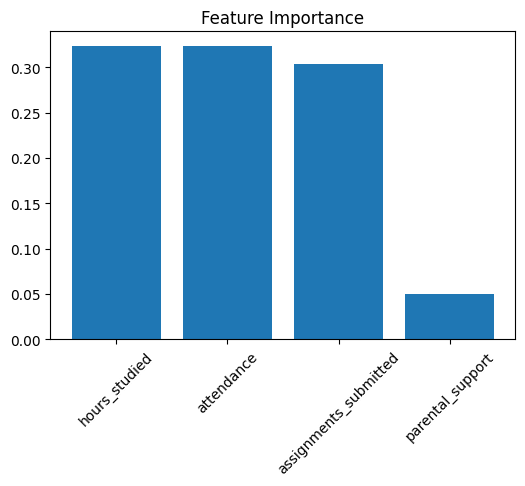

In [10]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
plt.bar(features, importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()
